# MACHINE LEARNING TECHNIQUE FOR EMPLOYEE PROMOTION

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import roc_curve, roc_auc_score

## Load Dataset 

In [2]:
# Load the datsets into a pandas DataFrame
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


## Data Description and Exploratory Data Analysis (EDA) 

In [3]:
# Display the shape of the dataset (number of rows and columns)
df.shape

(54808, 13)

In [4]:
# Checking for duplicate values
print('Duplicate data -->', df.duplicated().sum())

Duplicate data --> 0


In [5]:
# Display information about the dataset including data type and memory
print('Dataset Info: \n')
df.info()

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


### Checking for Missing Values 

In [6]:
# Checking for missing values
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# Getting the percentage of missing values\
missing_percentage = (df.isnull().sum().sum() * 100)/ len(df)
print('Percentage of missing valurs in our dataset is ', missing_percentage.round(2), '%')

Percentage of missing valurs in our dataset is  11.92 %


### Univariate Analysis


In [8]:
# Statistics summary for numeric features
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


#### Categorical Features

In [9]:
# Checking the number of categorical columns in the dataset
cat = df.select_dtypes(include='object').columns
len(cat)

5

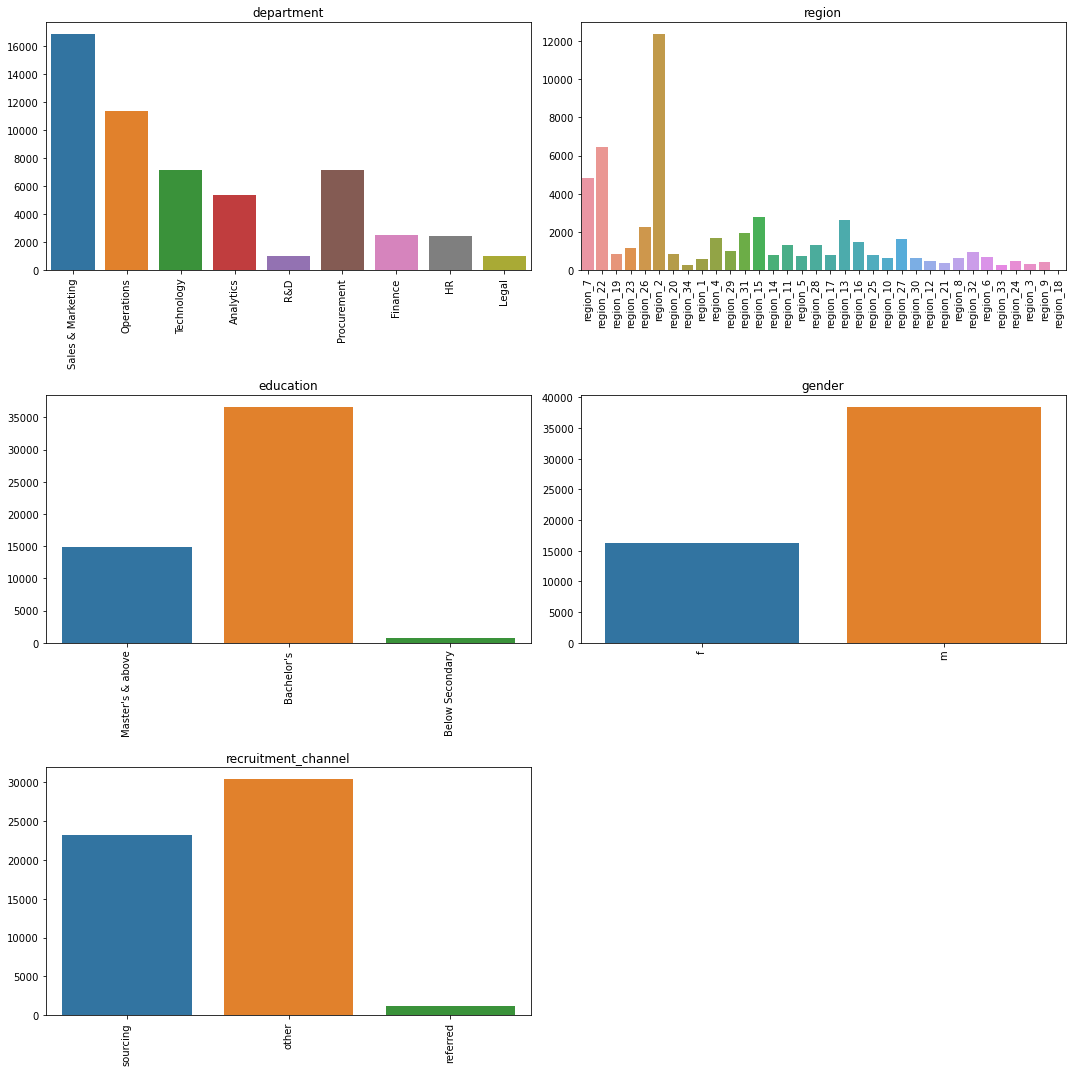

In [10]:
# Visualizing the distribution of the categorical columns

num_plots = len(cat)
num_columns = 2
num_rows = num_plots // num_columns + int(num_plots % num_columns > 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize= (15,15))
axes = axes.flatten()

for i, column in enumerate(cat):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
    
for i in range(num_plots, num_rows*num_columns):
    axes[i].set_visible(False)
    
fig.tight_layout()
plt.show()

* The ratio of male employees is higher in the organization
* Most of the employee belong to the Sales and Marketing department followed by operations and then procurement
* The observation indicates that Region 2 has the higher number of employees, followed by Region 22 and then Region 7
* The majority of employee possess a chechelors degree, while some hold master's degrees. There are relatively few emplyees with education levels below secondary education.
* The majority of employees were recruited through the "Other" Channel, while a small number were sourced, and only a few were referred

In [11]:
# Percentage of male in the organisation
males = df.gender.value_counts()['m']/len(df)
print('The percentage of male employees is :-->', round(males * 100, 2), '%')

# Percentage of femoales in the organisation
females = 1- males
print('The percentage of female employees is :-->', round(females * 100, 2), '%')


The percentage of male employees is :--> 70.24 %
The percentage of female employees is :--> 29.76 %


#### Numerical Features 

In [12]:
# Checking the number of numerical columns in the dataset
num = df.select_dtypes(include=np.number).columns
len(num)

8

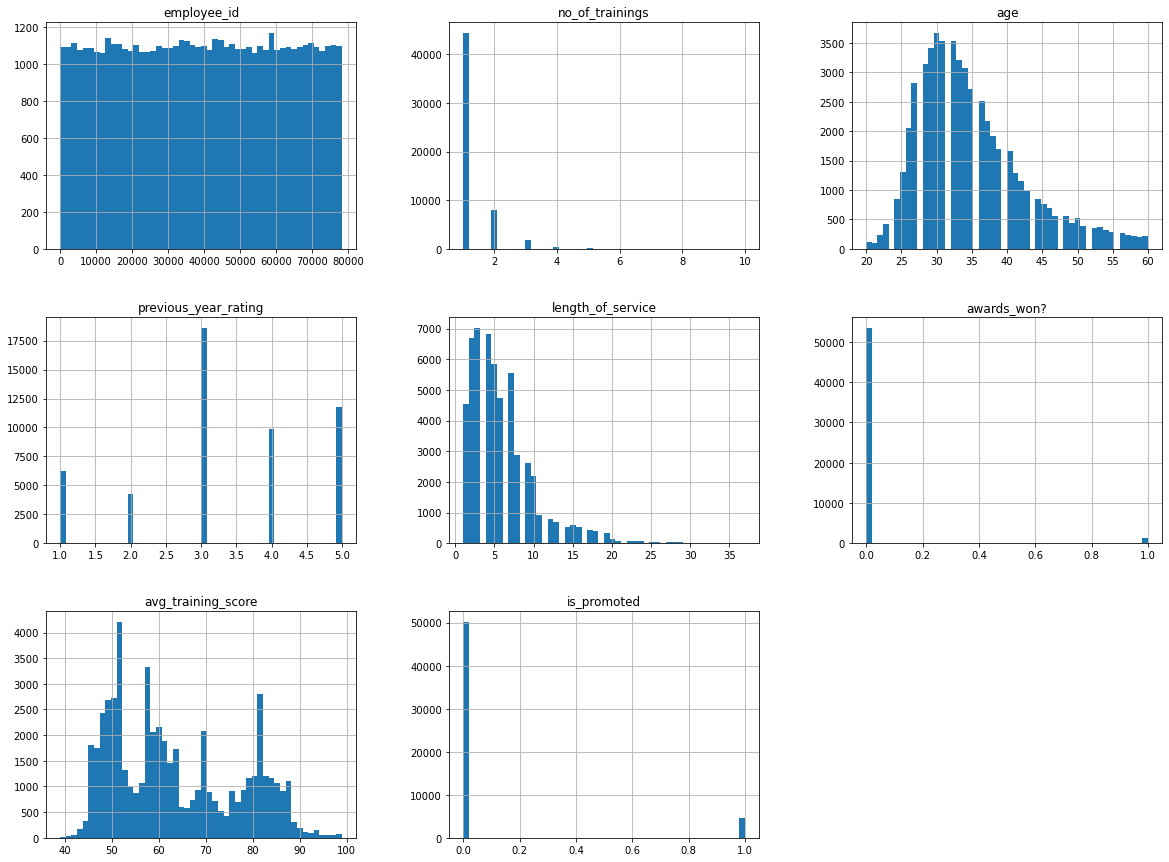

In [13]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

* Majority of employees received a previous rating of 3 out of 5 on the rating scale
* Majority of employees have tenure ranging from 1 to 7 years at the organisation, indicating a highly right-skewed distribution of tenure

In [14]:
# Percentage of employees who won awards in previous year:
print('Percentage of employee who won awards in previous year: ', round((df['awards_won?'].value_counts()[1]/ len(df)) * 100, 2), '%')

# Percentage of employees who were promoted in previous year
print('Percentage of Employees who were promoted in previous year: ', round((df['is_promoted'].value_counts()[1] / len(df)) * 100, 2), "%")

Percentage of employee who won awards in previous year:  2.32 %
Percentage of Employees who were promoted in previous year:  8.52 %


### Bivariate Analysis 

#### Categorical Features 

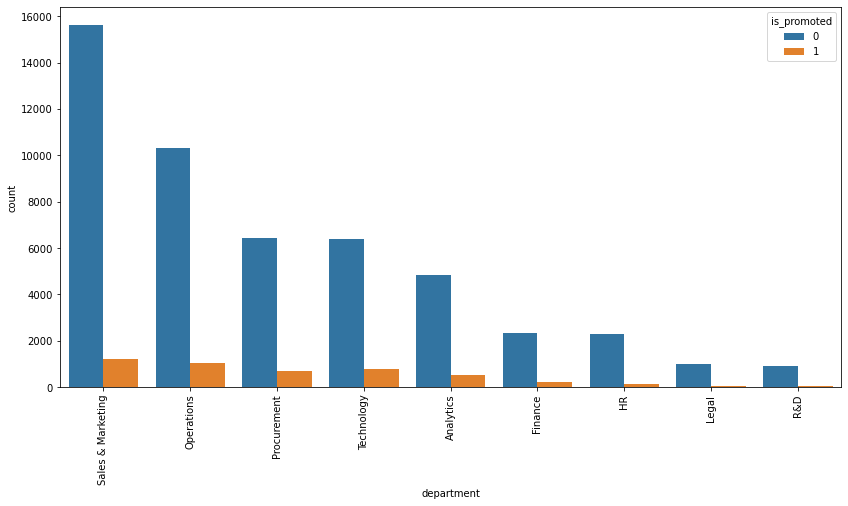

In [15]:
# Relationship between department and promotion
plt.figure(figsize=(14,7))
sns.countplot(x = df['department'], hue = df['is_promoted'], order = df['department'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

* Operations, Technology and Procurement department have slightly higher rate o promotion of employees

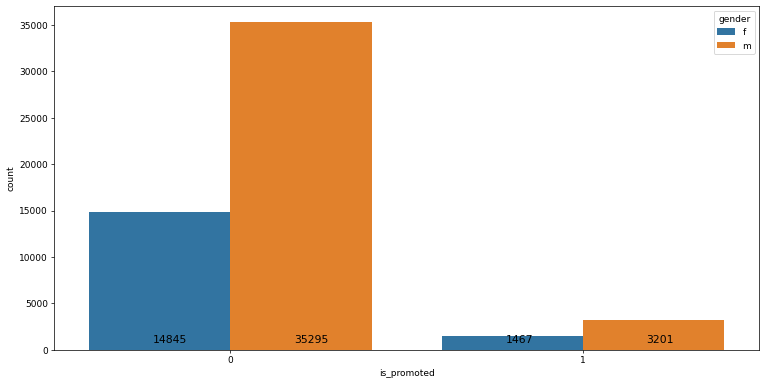

In [16]:
# relationship between gender and promotion
plt.figure(figsize =(14,7), dpi=65)

group = sns.countplot(x = df['is_promoted'], hue = df['gender'])

for p in group.patches:
    value = p.get_height()
    if value < 0:
        continue
    x = p.get_x() + .18
    y = p.get_y() + 750
    
    group.text((x), (y), int(value), fontsize=12)
plt.show()

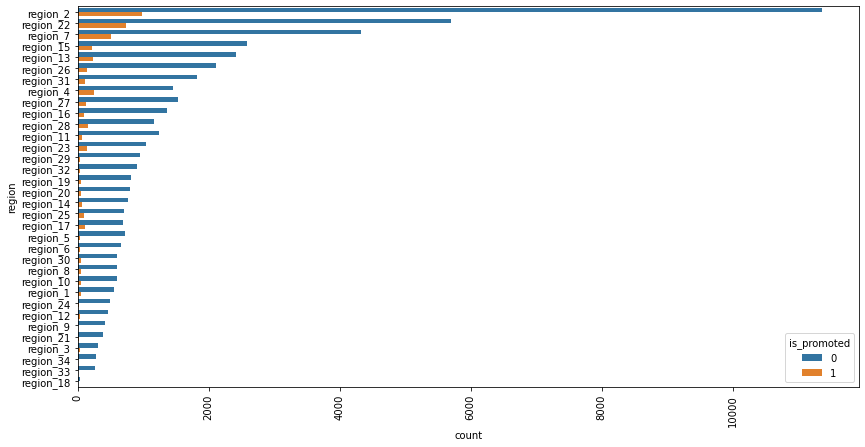

In [17]:
# regional distribution of employees
plt.figure(figsize=(14,7))
sns.countplot(y = df['region'], hue = df['is_promoted'], order = df['region'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

* regions with the highest number of employees have the highest number of promotions which is normal

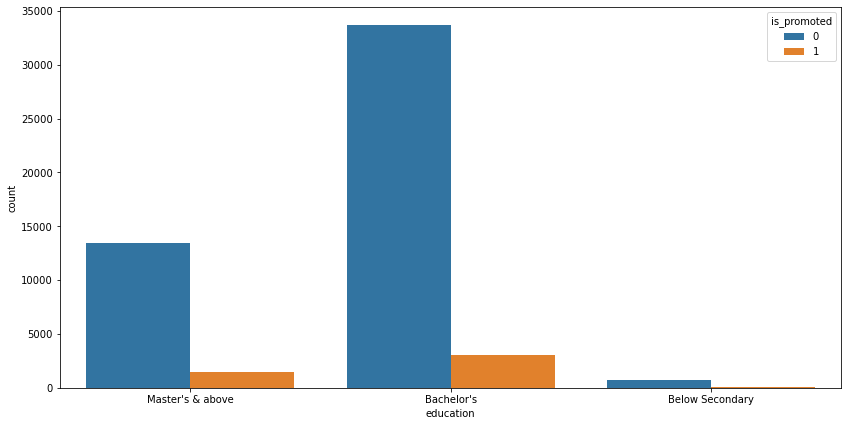

In [18]:
# Eduational distribution of employees
plt.figure(figsize =(14,7))
sns.countplot(x = df['education'], hue = df['is_promoted'])

plt.show()

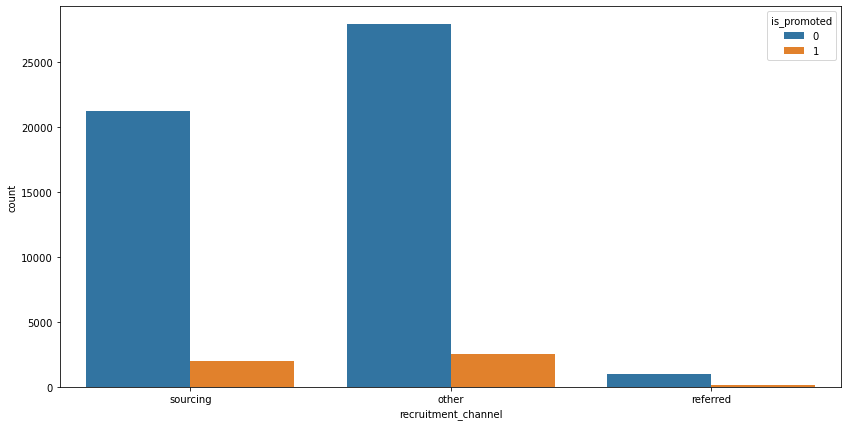

In [19]:
# Recruitment channel distribution of employees
plt.figure(figsize=(14,7))
sns.countplot(x = df['recruitment_channel'], hue = df['is_promoted'])

plt.show()

#### Numerica Features 

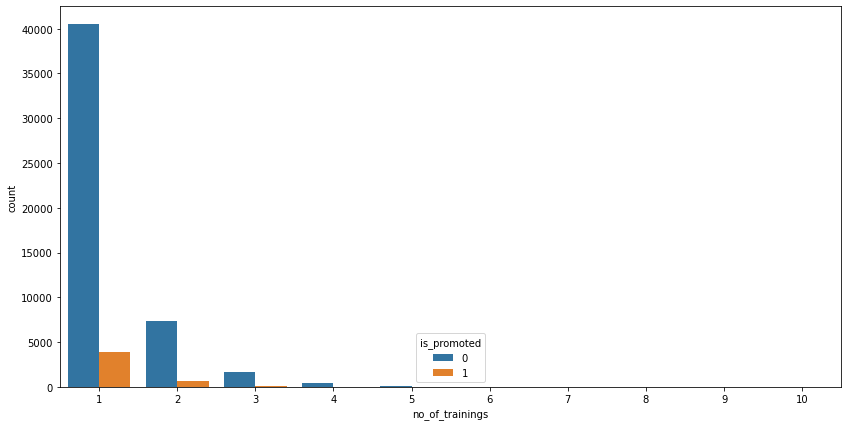

In [20]:
# Relationship between training and promotion
plt.figure(figsize = (14, 7))
sns.countplot(x = df.no_of_trainings, hue = df['is_promoted'])

plt.show()

* Mostly those employees that were promoted are those that learned one or two new skill in the previous year

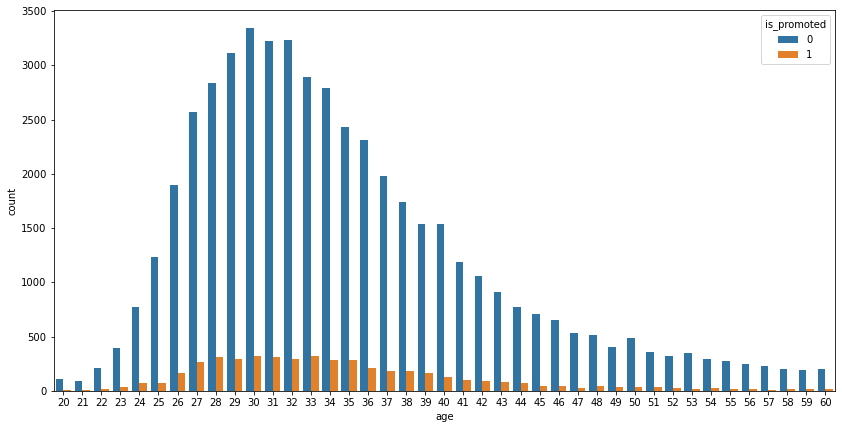

In [21]:
# Relationship between age and promotion
plt.figure(figsize = (14,7))
sns.countplot(x = df.age, hue = df['is_promoted'])

plt.show()

* we can observe that employees who are aged 27 -56 years were promoted

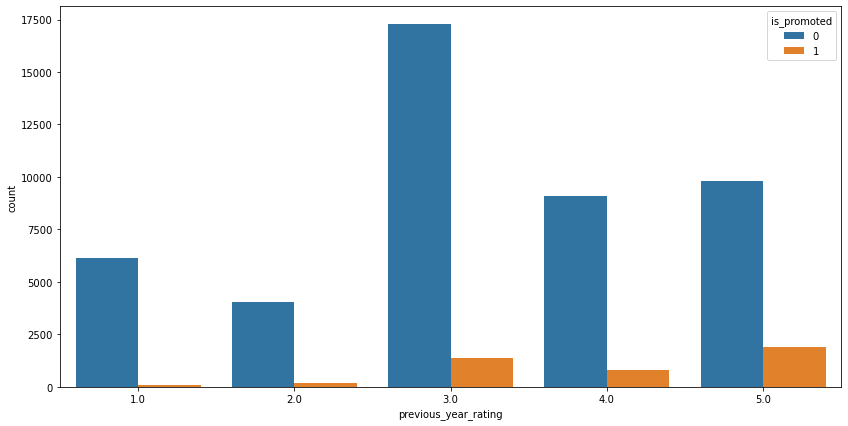

In [22]:
# relationship between employee rating promotion
plt.figure(figsize = (14,7))
sns.countplot(x = df.previous_year_rating, hue = df['is_promoted'])

plt.show()

* We observe that people who got a rating of 3-5 were promoted the most

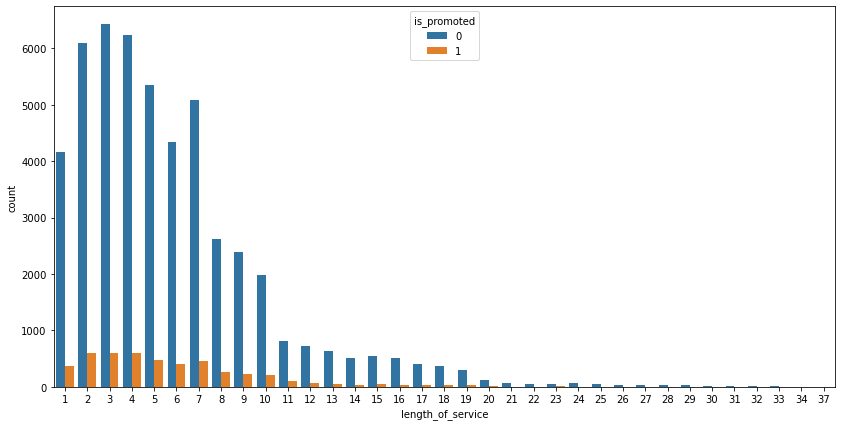

In [23]:
# relationship between employee service time and promotion
plt.figure(figsize = (14,7))
sns.countplot(x = df.length_of_service, hue = df['is_promoted'])
plt.show()

* We observe that length of service does not affect the promotion that much

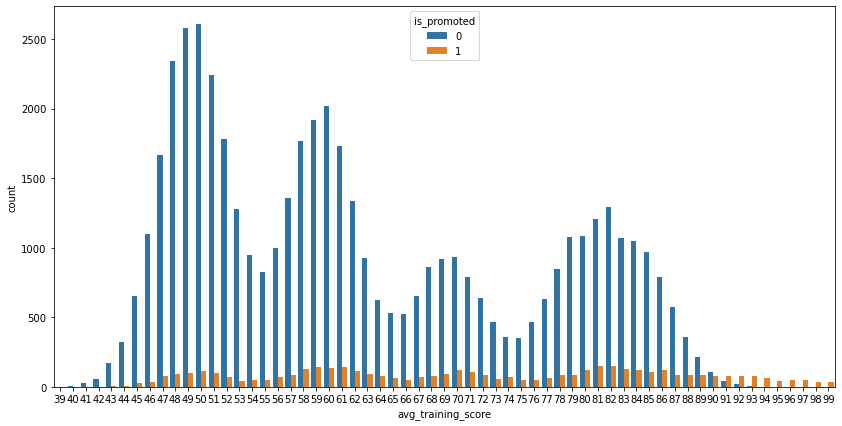

In [24]:
# relationship between training score and promotion
plt.figure(figsize=(14,7))
sns.countplot(x = df.avg_training_score, hue = df['is_promoted'])

plt.show()

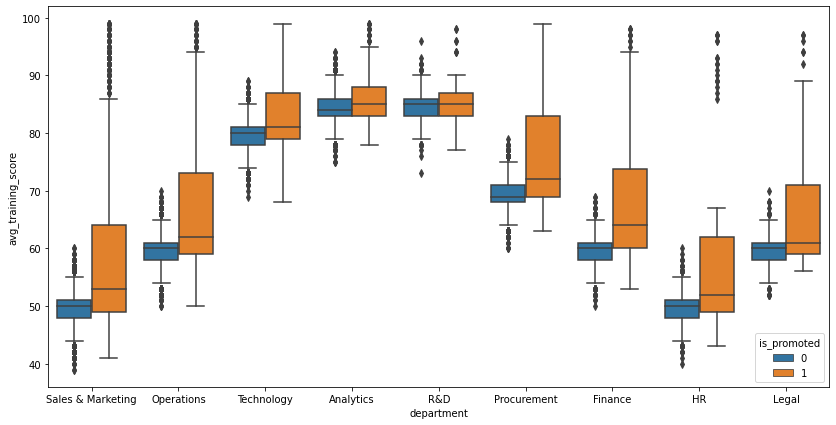

In [25]:
# departmental distribution of employees
plt.figure(figsize=(14,7))
sns.boxplot(x = df['department'], y = df['avg_training_score'], hue = df['is_promoted'])

plt.show()

* Most of the employees who scored in the range of 48-51, 58-61 and 80-83 were promoted

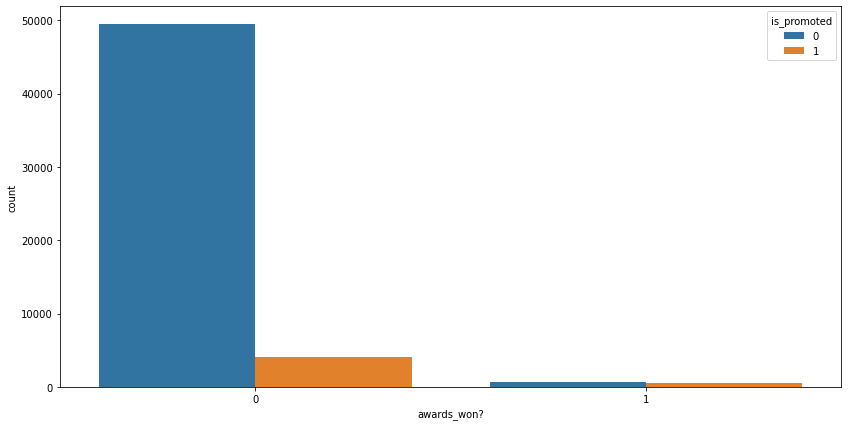

In [26]:
# departmental distriburtion of employees

plt.figure(figsize=(14,7))
sns.countplot(x = df['awards_won?'], hue = df['is_promoted'])
plt.show()

* we observe the the employees who won an award had sure chances of promotion as compared to others.

Text(0.5, 1.0, 'Correlation Heatmap')

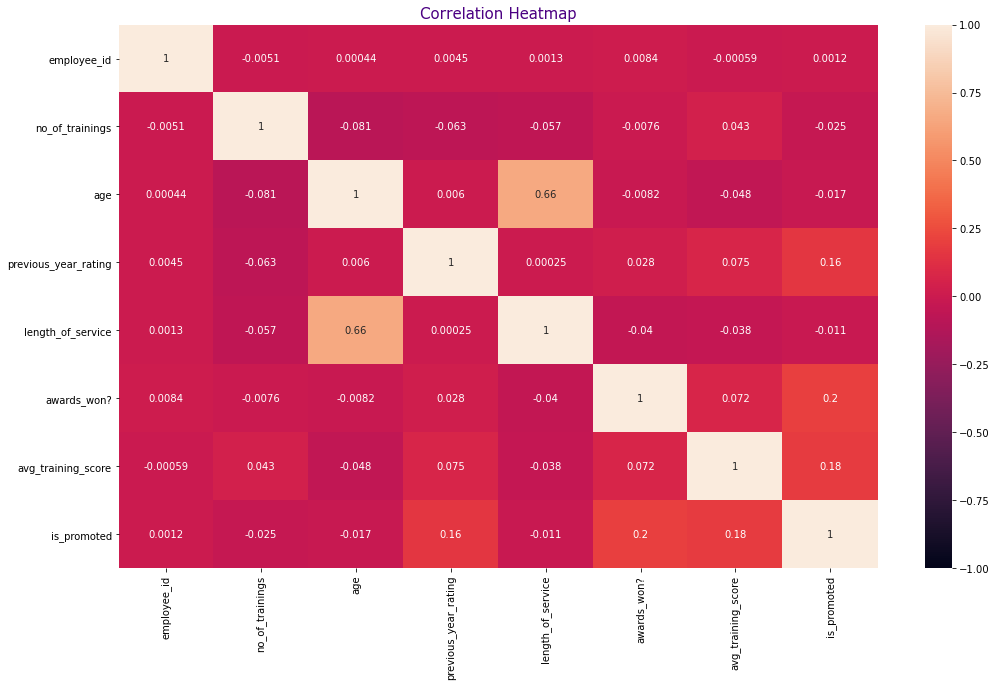

In [27]:
#Correlation matrix to display the correlation between our numerical values
num_cols= df.select_dtypes(include=np.number).columns
corr_matrix =df[num_cols].corr()
plt.figure(figsize=(17,10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap',color='indigo', font='Verdana', fontsize=15)

 We find out that:
   * there is a positive corrlation between awards_won and is_promoted (0.2), it suggests that emloyees that earn awards usually qualify better for a promotion than other employees.
   * There is a mild positive correlation between avg_traing_score and is_promoted (0.18), which indecates that employees that got high rating for previous year have higher chance of promotion.
   * There is a mild positive correlation between previous year rating and is_promoted (0.15), which indicae tht employees that got high for previous year have higher chance of promotion.
   * There is a very strong poistive correlation between age and length of service which indicate that older employees ten to stay working at te fir for longer periiod of time.

## Data Preprocesing 

### Treating missing values 

In [28]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

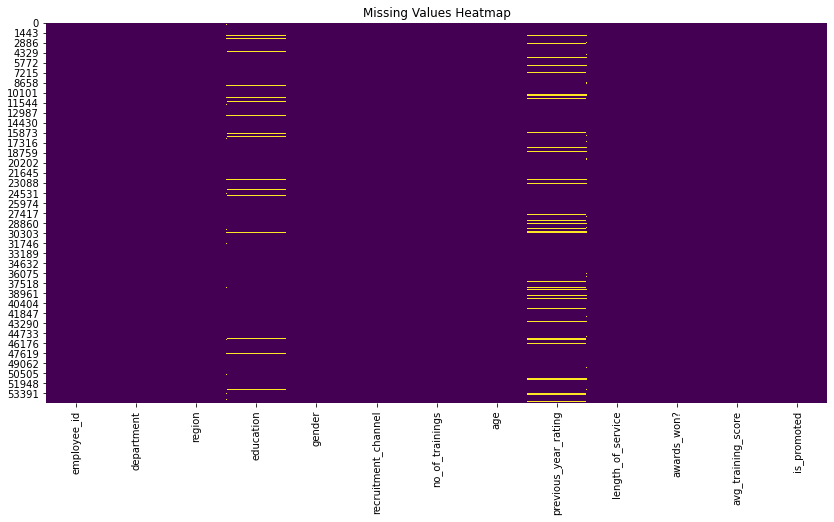

In [29]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

It can be seen that only two columns contains missing values. The eductaion column and the previous_year_rating. This can be indicative of non-random missing value. To deal with the missing value, we first check if we can discover a pattern in the missing value. If so, we deal with the missing value with business logic else we impute the central tendency values.

In [30]:
df_total = df.isnull().sum()
df_percent = round((df_total / df.shape[0])* 100,2)

# Creating a dataframe to show total number of missing values and percentage of missing values
df_missing = pd.DataFrame({'Missing Values': df_total, 'Percentage(%)': df_percent})

df_missing.sort_values(by ='Missing Values', ascending=False).head()

,Missing Values,Percentage(%)
previous_year_rating,4124,7.52
education,2409,4.40
employee_id,0,0.00
department,0,0.00
region,0,0.00


#### Working on the previou_year_rating

In [31]:
# Filter rows where previous year rating is null
pyr = df[df['previous_year_rating'].isnull()]
pyr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0


In [32]:
# Count the frequency of values in the length of service column\
pyr['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

Because all employee with a null previous year rating have a service length of 1, indicating they are likely new recruits with only one year of experience, they may not have a previous year rating. Therefore, we replace the null values with 0 as an imputation strategy.

In [33]:
#Filing the dataset with 0

#For train
df['previous_year_rating'].fillna(value=0, inplace=True)


#### Working on the Education 

In [34]:
# imputing the missing values in education with the most frequent value since it is a categorical variable
df['education'].fillna(df.education.value_counts().index[0], inplace=True)


In [35]:
# Checking for missing values
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Outlier

In [36]:
# Since outliers are only possible in numerical data, let's analyze the numeria columns
df.select_dtypes('number').columns.to_list()

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

An outlier can only exist in the avg_training_score and length_of_service columns. As other variables have a limited number of values

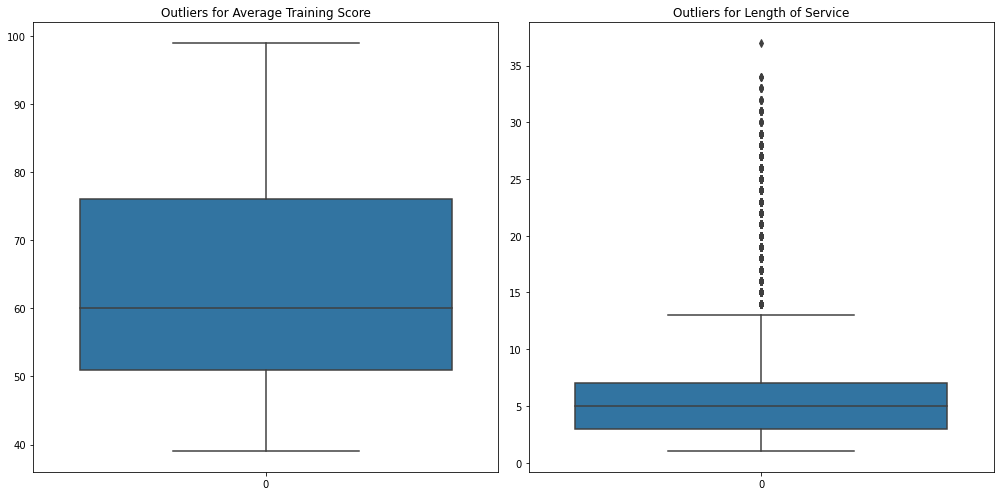

In [37]:
plt.figure(figsize = (14,7))

# Plot the first box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df['avg_training_score'])
plt.title('Outliers for Average Training Score')

# Plot the second box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df['length_of_service'])
plt.title('Outliers for Length of Service')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* There are no outlier in the avg_training_score column
* There are some points above the upper_fence in the length of service column. Those are the outlier values. We cap the outliers to the maximum value

In [38]:
df['length_of_service'] = np.where(df['length_of_service']>13, 13, df['length_of_service'])

df['length_of_service'].max()

13

## Feature Engineering

### Label Encoding

In [39]:
le = LabelEncoder()
cat_features = ['gender', 'education', 'department', 'recruitment_channel', 'region']


for feature in cat_features:
    encoded_data = le.fit_transform(df[feature])
    df[feature]=encoded_data
    
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
5,58896,0,11,0,1,2,2,31,3.0,7,0,85,0
6,20379,4,12,0,0,0,1,31,3.0,5,0,59,0
7,16290,4,27,2,1,2,1,33,3.0,6,0,63,0
8,73202,0,12,0,1,0,1,28,4.0,5,0,83,0
9,28911,7,0,2,1,2,1,32,5.0,5,0,54,0


### Features and Target

In [40]:
# Exclude target variable and non-informative features
X = df.drop(['employee_id', 'is_promoted'], axis=1)

y = df['is_promoted']

#### Standard Scaling

In [41]:
#Standardizing the data using Standard Scaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

x = pd.DataFrame(x_scaler, columns=X.columns)

x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0.808933,1.776526,1.619758,-1.536223,1.154111,-0.415276,0.025598,1.283878,0.711461,-0.154018,-1.075931
1,-0.388183,-0.163034,-0.628838,0.650947,-0.885239,-0.415276,-0.627135,1.283878,-0.460068,-0.154018,-0.253282
2,0.808933,-0.619401,-0.628838,0.650947,1.154111,-0.415276,-0.104948,-0.052623,0.418579,-0.154018,-1.001145
3,0.808933,-0.048942,-0.628838,0.650947,-0.885239,1.226063,0.547785,-1.389124,1.297225,-0.154018,-1.001145
4,1.207972,0.293333,-0.628838,0.650947,-0.885239,-0.415276,1.331064,-0.052623,-1.045832,-0.154018,0.718939


### Train test split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 11)
(16443, 11)
(38365,)
(16443,)


## Model Implementation

In [43]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

logistic_regression_model = lr.fit(X_train, y_train)
decision_tree_model = dt.fit(X_train,y_train)
random_forest_model = rf.fit(X_train, y_train)
gb_model = gb.fit(X_train, y_train)

In [44]:
models = [logistic_regression_model, decision_tree_model, random_forest_model, gb_model]

train_accuracy = []
test_accuracy = []

for  model in models:
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_predict))
    test_accuracy.append(accuracy_score(y_test, y_test_predict))
    

In [45]:
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier']

model_summary = pd.DataFrame({'Model': model_names, 'Train Score': train_accuracy, 'Test Score': test_accuracy})
model_summary

,Model,Train Score,Test Score
0,Logistic Regression,0.917086,0.922338
1,Decision Tree Classifier,0.999609,0.881956
2,Random Forest Classifier,0.999583,0.937177
3,Gradient Boosting Classifier,0.939085,0.942894


In [46]:
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

for name, clf in classifiers.items():
    print('\tClassification Report for', name)
    print('--------------------------------------------------------------')
    y_predict = clf.predict(X_test)
    print(classification_report(y_test_predict, y_predict))
    print('--------------------------------------------------------------\n\n')
    



	Classification Report for Logistic Regression
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15999
           1       0.71      0.21      0.33       444

    accuracy                           0.98     16443
   macro avg       0.84      0.61      0.66     16443
weighted avg       0.97      0.98      0.97     16443

--------------------------------------------------------------


	Classification Report for Decision Tree
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     15999
           1       0.24      0.93      0.39       444

    accuracy                           0.92     16443
   macro avg       0.62      0.92      0.67     16443
weighted avg       0.98      0.92      0.94     16443

--------------------------------------------------------------


	C

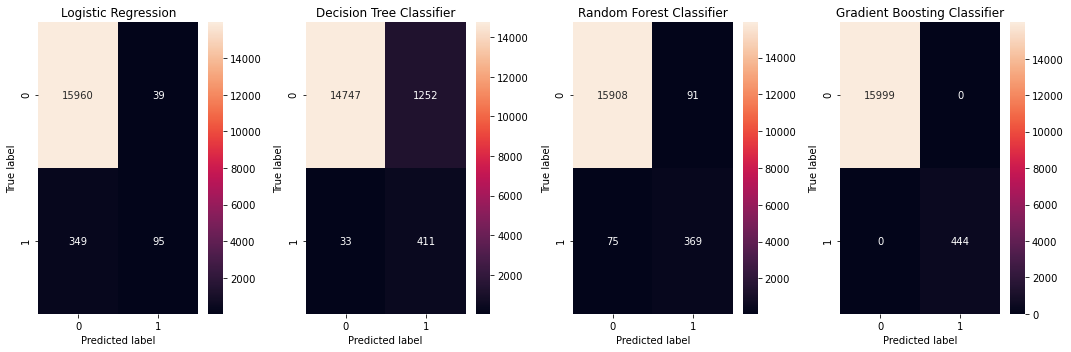

In [47]:

#plot confusion matrix
models = [lr, dt, rf, gb]


# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
     # Make predictions on the test data
    y_predict = model.predict(X_test)
   
    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_predict, y_predict)

    # Plot confusion matrix for Logistic Regression
    sns.heatmap(cm, annot=True, fmt='g', ax=axes[i])
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel('Predicted label')
    axes[i].set_ylabel('True label')



plt.tight_layout()
plt.show()

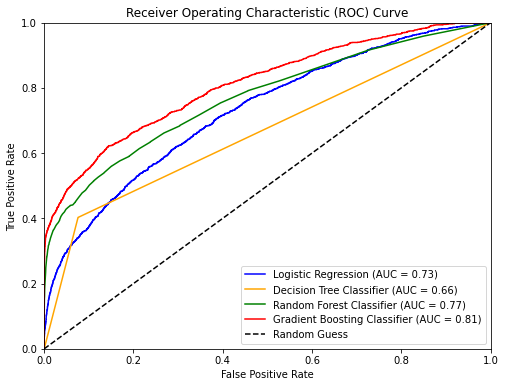

In [48]:
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Model Optimization

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

x_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

print(X_train_resampled.shape)
print(x_test_resampled.shape)
print(y_train_resampled.shape)
print(y_test_resampled.shape)


(70060, 11)
(30220, 11)
(70060,)
(30220,)


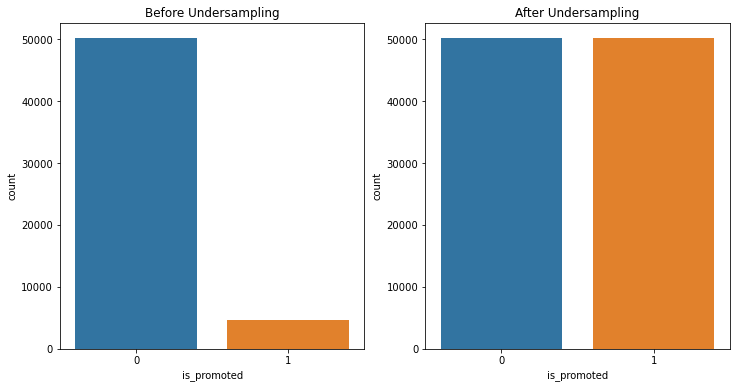

In [42]:
df1 = pd.DataFrame({'is_promoted':y_train_resampled})
df2 = pd.DataFrame({'is_promoted': y_test_resampled})
y_resampled_df = pd.concat([df1,df2], axis=0)


#Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=df, x='is_promoted', ax=axs[0])
axs[0].set_label(axs[0].containers[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=y_resampled_df, x='is_promoted', ax=axs[1])
axs[1].set_label(axs[1].containers[0])
axs[1].set_title('After Undersampling')
plt.show()

In [51]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train_resampled)
X_test_scaler = scaler.transform(x_test_resampled)

# Print the shapes of the new datasets
print("Shape of x_train_scaler:", X_train_scaler.shape)
print("Shape of x_test_scaler:", X_test_scaler.shape)
print("Shape of y_train_res:", y_train_resampled.shape)
print("Shape of y_test_res:", y_test_resampled.shape)



Shape of x_train_scaler: (70060, 11)
Shape of x_test_scaler: (30220, 11)
Shape of y_train_res: (70060,)
Shape of y_test_res: (30220,)


In [52]:
#Cretae list of models

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   GradientBoostingClassifier()
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, X_train_scaler, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}:\n {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")
    print('-----------------------------------------------------')

Accuracy for LogisticRegression:
 [0.66542963 0.66171853 0.65979161 0.66293177 0.65465315]
Average accuracy for LogisticRegression: 0.6609049386240365

-----------------------------------------------------
Accuracy for DecisionTreeClassifier:
 [0.92292321 0.92085355 0.92071082 0.91692835 0.91542963]
Average accuracy for DecisionTreeClassifier: 0.9193691121895519

-----------------------------------------------------
Accuracy for RandomForestClassifier:
 [0.9614616  0.95710819 0.95946332 0.96131887 0.95989152]
Average accuracy for RandomForestClassifier: 0.9598487011133313

-----------------------------------------------------
Accuracy for GradientBoostingClassifier:
 [0.89380531 0.88859549 0.88888096 0.89387668 0.88231516]
Average accuracy for GradientBoostingClassifier: 0.8894947188124466

-----------------------------------------------------


### Hyperparmeter Turning

#### Logistic Regression

In [53]:
# Define the parameter grid for hyperparameter tuning
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaler, y_train_resampled)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_lr = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
best_lr.fit(X_train_scaler, y_train_resampled)
# Get the training accuracy score
lr_train_accuracy = best_lr.score(X_train_scaler, y_train_resampled)

# Evaluate the final models on the test set for each model
lr_y_pred = best_lr.predict(X_test_scaler)
lr_test_accuracy = accuracy_score(y_test_resampled, lr_y_pred)
lr_confusion = confusion_matrix(y_test_resampled, lr_y_pred)


# Print the evaluation results
print("Logistic Regression")
print("Best Paramater: ", best_lr)
print("Training Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_accuracy)

Logistic Regression
Best Paramater:  LogisticRegression(C=0.1, max_iter=1000, random_state=42)
Training Accuracy: 0.6608906651441622
Test Accuracy: 0.6642620780939775


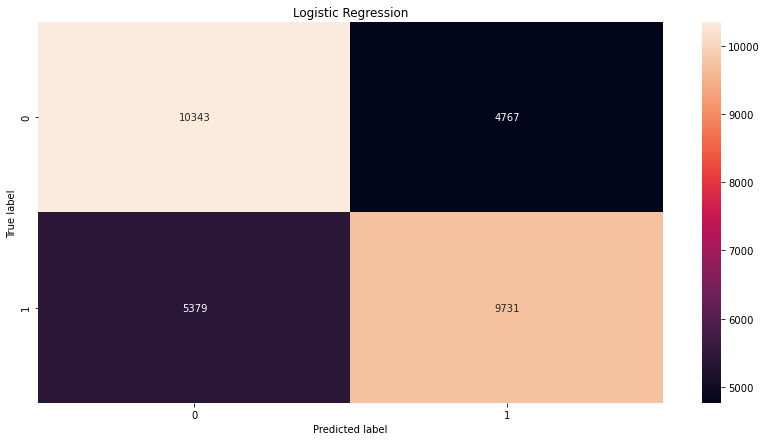

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67     15110
           1       0.67      0.64      0.66     15110

    accuracy                           0.66     30220
   macro avg       0.66      0.66      0.66     30220
weighted avg       0.66      0.66      0.66     30220



In [54]:
plt.figure(figsize = (14,7))
cm = confusion_matrix(y_test_resampled, lr_y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.title("Logistic Regression")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()


print("Classification report:\n", classification_report(y_test_resampled, lr_y_pred))

#### Decision Tree

In [55]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6]
}

# Perform GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaler, y_train_resampled)

# Get the best estimator
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the train set
train_predictions = best_dt_classifier.predict(X_train_scaler)

# Predict on the test set
test_predictions = best_dt_classifier.predict(X_test_scaler)

# Calculate train accuracy
dt_train_accuracy = accuracy_score(y_train_resampled, train_predictions)
print("Train Accuracy:", dt_train_accuracy)

# Calculate test accuracy
dt_test_accuracy = accuracy_score(y_test_resampled, test_predictions)
print("Test Accuracy:", dt_test_accuracy)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.9817442192406509
Test Accuracy: 0.8966909331568498


Text(105.0, 0.5, 'True label')

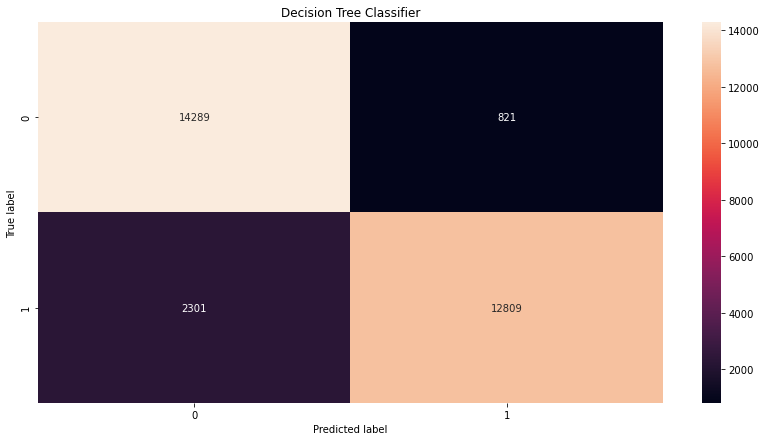

In [56]:
plt.figure(figsize = (14,7))
cm = confusion_matrix(y_test_resampled, test_predictions)

sns.heatmap(cm, annot=True, fmt='g')
plt.title("Decision Tree Classifier")
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [57]:
plt.show()
print("Classification report:\n", classification_report(y_test_resampled, test_predictions))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15110
           1       0.94      0.85      0.89     15110

    accuracy                           0.90     30220
   macro avg       0.90      0.90      0.90     30220
weighted avg       0.90      0.90      0.90     30220



#### Random Forest

In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80,90,100],
    'max_features': [2,3],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [8,10,12],
    'n_estimators': [100,200,300]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaler, y_train_resampled)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

rf_train_prediction = grid_search.predict(X_train_scaler)
rf_test_prediction = grid_search.predict(X_test_scaler)

# Print train and test accuracy
rf_train_accuracy = accuracy_score(y_train_resampled, rf_train_prediction)
rf_test_accuracy = accuracy_score(y_test_resampled, rf_test_prediction)
print("Train accuracy:", rf_train_accuracy)
print("Test accuracy:", rf_test_accuracy)

Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Train accuracy: 0.9798172994576078
Test accuracy: 0.9027134348113832


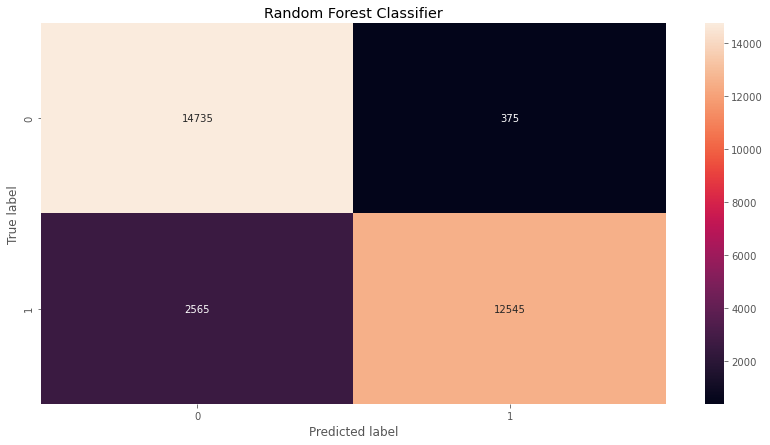

In [68]:
plt.figure(figsize = (14,7))
cm = confusion_matrix(y_test_resampled, rf_test_prediction)

sns.heatmap(cm, annot=True, fmt='g')
plt.title("Random Forest Classifier")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()



In [69]:
print("Classification report:\n", classification_report(y_test_resampled, rf_test_prediction))

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     15110
           1       0.97      0.83      0.90     15110

    accuracy                           0.90     30220
   macro avg       0.91      0.90      0.90     30220
weighted avg       0.91      0.90      0.90     30220



### Gradient Boosting Classifier

In [61]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.5], 
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest classifier
gb = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose =2)
grid_search.fit(X_train_scaler, y_train_resampled)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

gb_train_prediction = grid_search.predict(X_train_scaler)
gb_test_prediction = grid_search.predict(X_test_scaler)

# Print train and test accuracy
gb_train_accuracy = accuracy_score(y_train_resampled, gb_train_prediction)
gb_test_accuracy = accuracy_score(y_test_resampled, gb_test_prediction)
print("Train accuracy:", gb_train_accuracy)
print("Test accuracy:", gb_test_accuracy)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train accuracy: 0.9708678275763631
Test accuracy: 0.9663467902051621


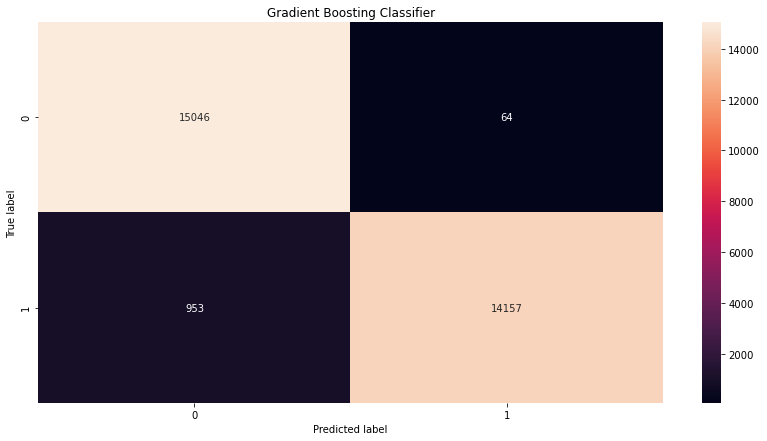

In [62]:
plt.figure(figsize = (14,7))
cm = confusion_matrix(y_test_resampled, gb_test_prediction)

sns.heatmap(cm, annot=True, fmt='g')
plt.title("Gradient Boosting Classifier")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [63]:
print("Classification report:\n", classification_report(y_test_resampled, gb_test_prediction))

Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15110
           1       1.00      0.94      0.97     15110

    accuracy                           0.97     30220
   macro avg       0.97      0.97      0.97     30220
weighted avg       0.97      0.97      0.97     30220



#### Compairing Models Accuracies

In [70]:
# Create a dictionary of model names and their evaluation results
results = {'Logistic Regression': [lr_train_accuracy,lr_test_accuracy],
           'Decision Tree': [dt_train_accuracy, dt_test_accuracy],
           'Random Forest': [rf_train_accuracy, rf_test_accuracy],
           'Gradient Boosting' : [gb_train_accuracy, gb_test_accuracy]
          }

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Training Accuracy','Test Accuracy'])

# Display the DataFrame
df_results

,Training Accuracy,Test Accuracy
Logistic Regression,0.660891,0.664262
Decision Tree,0.981744,0.896691
Random Forest,0.979817,0.902713
Gradient Boosting,0.970868,0.966347


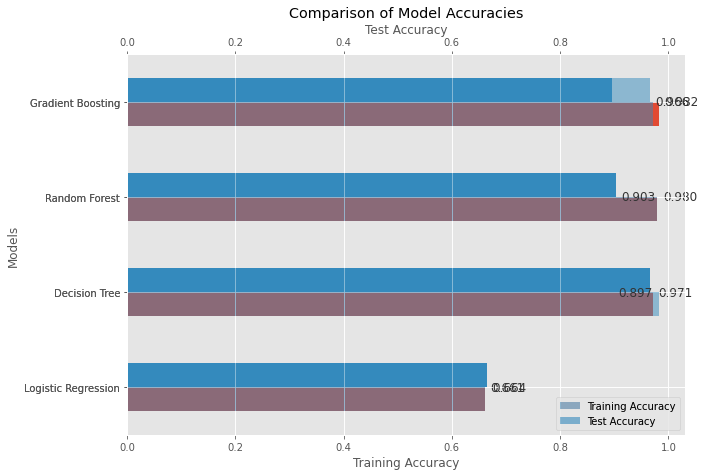

In [71]:
# Set the plot style
plt.style.use('ggplot')

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
df_results.sort_values('Training Accuracy', ascending=True).plot(kind='barh', ax=ax)
# create 2nd Axis
ax2 = ax.twiny()
df_results.sort_values('Test Accuracy', ascending=True).plot(kind='barh', ax=ax2, alpha=0.5, color='C1')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Test Accuracy')

# Add the axis labels and Title
ax.set_xlabel('Training Accuracy')
ax.set_ylabel('Models')
ax.set_title('Comparison of Model Accuracies')

#Add Data Labels for Training Accuracy
for i, v in enumerate(df_results['Training Accuracy'].sort_values()):
    ax.text(v + 0.01, i, f'{v:.3f}', color='#333333', fontsize=12, va='center')

#Add Data Labels for Test Accuracy
for i, v in enumerate(df_results['Test Accuracy'].sort_values()):
    ax2.text(v + 0.01, i, f'{v:.3f}', color='#333333', fontsize=12, va='center')
# Show the plot
plt.show()


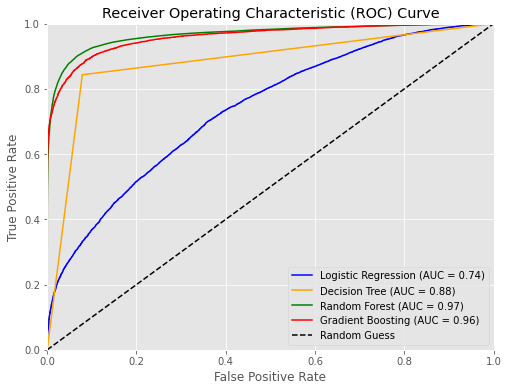

In [72]:
model_list = [lr, dt, rf, gb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', "Gradient Boosting"]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(X_train_scaler, y_train_resampled)
    y_pred_prob = model.predict_proba(X_test_scaler)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
    auc = roc_auc_score(y_test_resampled, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()